In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from nltk.tokenize import WordPunctTokenizer,word_tokenize
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import *
from random import choice
from string import ascii_uppercase
import timestring
from datetime import datetime

#create data frame containing your data, each column can be accessed # by df['column   name']
# df = pd.concat([df_bot,df_non_bot])

df = pd.read_csv('training_data_2_csv_UTF.csv')


def verified(df):
    if df['verified'] == 'TRUE':
        return 1
    else:
        return 0

def default_profile(df):
    if df['default_profile'] == 'TRUE':
        return 1
    else:
        return 0

def default_profile_image(df):
    if pd.notnull(df['default_profile_image']) and df['default_profile_image'] == 'TRUE':
        return 1
    else:
        return 0

def extended_profile(df):
    if df['has_extended_profile'] == 'TRUE':
        return 1
    else:
        return 0

def name_bot(df):
    if pd.notnull(df['screen_name']) and 'bot' in df['screen_name'].lower():
        return 1
    else:
        return 0

def name_only_bot(df):
    if pd.notnull(df['name']) and 'bot' in str(df['name']).lower():
        return 1
    else:
        return 0

def desc_bot(df):
    if pd.notnull(df['description']) and 'bot' in (df['description'].lower()):
        return 1
    else:
        return 0

def listed_count(df):
    if df['listed_count'] == 'None':
        return 0
    else:
        return df['listed_count']

def friends_count(df):
    if df['friends_count'] == 'None':
        return 0
    else:
        return df['friends_count']

def followers(df):
    if df['followers_count'] == 'None':
        return 0
    else:
        return df['followers_count']

def length_desc(df):
    if pd.notnull(df['description']):
        return len(df['description'])
    else:
        return 0
def length_location(df):
    if pd.notnull(df['location']):
        return len(df['location'])
    else:
        return 0

def days(df):
    try:
        if pd.notnull(df['created_at']):
            dt = datetime.strptime(str(timestring.Date(df['created_at'])), "%Y-%m-%d %H:%M:%S")
            return abs(datetime.now() - dt).days
    except:
        return 365

    return 365

#dt_1 = parser.parse(df['created_at'][0])

print(type(df['created_at'][0]))
dt_2 = datetime.strptime(str(timestring.Date(df['created_at'][0])),"%Y-%m-%d %H:%M:%S")
dt_1 = datetime.strptime(str(timestring.Date(df['created_at'][1])),"%Y-%m-%d %H:%M:%S")

print(abs(datetime.now()-dt_2).days)


df['verified'] = df.apply(verified,axis=1)
df['default_profile_image'] = df.apply(default_profile_image,axis=1)
df['default_profile'] = df.apply(default_profile,axis=1)
df['name'] = df.apply(name_bot,axis=1)
df['name_only'] = df.apply(name_only_bot,axis=1)
df['desc'] = df.apply(desc_bot,axis=1)
df['location'] = df.apply(length_location,axis=1)
df['len_desc'] = df.apply(length_desc,axis=1)
df['ep'] = df.apply(extended_profile,axis=1)
df['date'] = df.apply(days,axis=1)
df = df[['followers_count','friends_count','listedcount','verified','statuses_count','default_profile','default_profile_image','name','name_only','desc','location','len_desc','favourites_count','ep','date','bot']]



<class 'str'>
5605


In [5]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['bot'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['bot'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['bot'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['bot'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9414
AUC Score (Train): 0.986656
CV Score : Mean - 0.965196 | Std - 0.006593402 | Min - 0.9562789 | Max - 0.970981


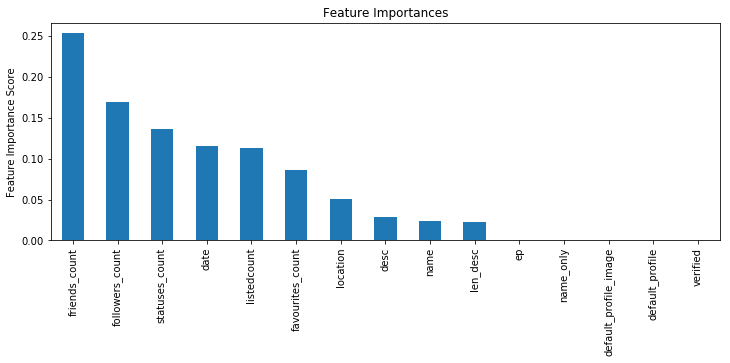

In [6]:
#gradient boosting
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df, predictors)


Model Report
Accuracy : 0.9936
AUC Score (Train): 0.999841
CV Score : Mean - 0.9561909 | Std - 0.009090922 | Min - 0.9439458 | Max - 0.96849


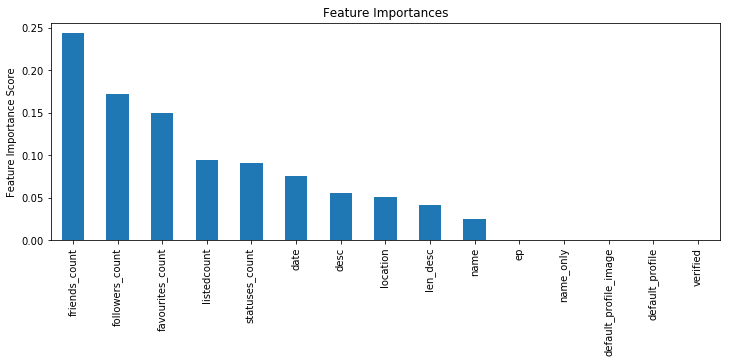

In [7]:
#random forest
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = RandomForestClassifier(random_state=10)
modelfit(gbm0, df, predictors)


Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999999
CV Score : Mean - 0.8608379 | Std - 0.01509217 | Min - 0.8421931 | Max - 0.8749358


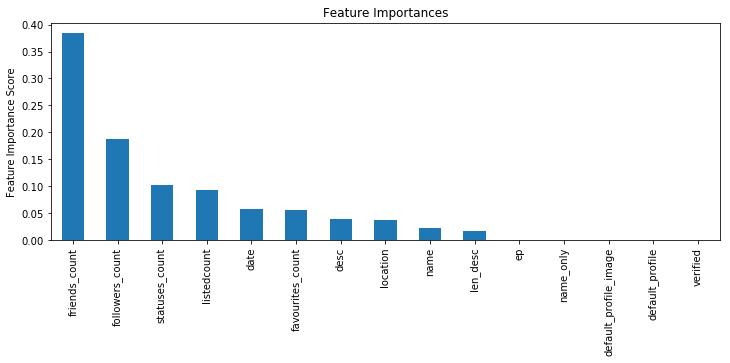

In [8]:
#decision tree
from sklearn import tree

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = tree.DecisionTreeClassifier()
modelfit(gbm0, df, predictors)

In [9]:
#Multinomial`
from sklearn.naive_bayes import MultinomialNB

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = MultinomialNB()
modelfit(gbm0, df, predictors,printFeatureImportance=False)


Model Report
Accuracy : 0.6643
AUC Score (Train): 0.681141
CV Score : Mean - 0.680823 | Std - 0.02300462 | Min - 0.6451656 | Max - 0.7152282


In [10]:
from sklearn.naive_bayes import BernoulliNB

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = BernoulliNB()
modelfit(gbm0, df, predictors,printFeatureImportance=False)


Model Report
Accuracy : 0.779
AUC Score (Train): 0.849602
CV Score : Mean - 0.8466736 | Std - 0.01044172 | Min - 0.8359977 | Max - 0.866442


In [11]:
from sklearn.linear_model import LogisticRegression

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = LogisticRegression()
modelfit(gbm0, df, predictors,printFeatureImportance=False)


Model Report
Accuracy : 0.7515
AUC Score (Train): 0.835391
CV Score : Mean - 0.8373266 | Std - 0.02389143 | Min - 0.8047766 | Max - 0.8732407


In [13]:
from sklearn import svm

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = svm.SVC(probability=True)
modelfit(gbm0, df, predictors,printFeatureImportance=False)


Model Report
Accuracy : 0.9989
AUC Score (Train): 0.999999
CV Score : Mean - 0.5350765 | Std - 0.007091216 | Min - 0.5241654 | Max - 0.5449898



Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999999
CV Score : Mean - 0.9654005 | Std - 0.008009789 | Min - 0.9553993 | Max - 0.9738829


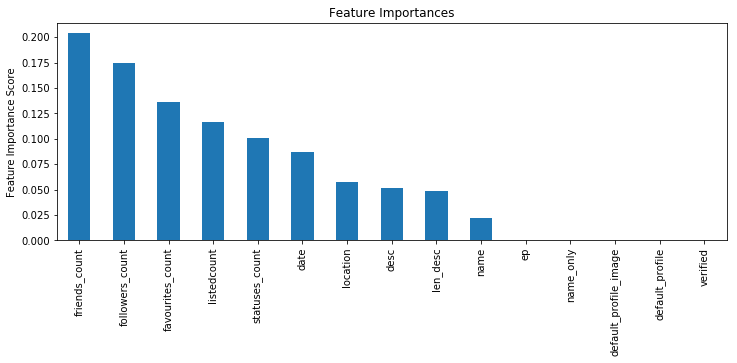

In [16]:
#random forest
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = RandomForestClassifier(n_estimators=100,criterion = "entropy")
modelfit(gbm0, df, predictors)


Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999997
CV Score : Mean - 0.9657204 | Std - 0.009019551 | Min - 0.9541153 | Max - 0.9760144


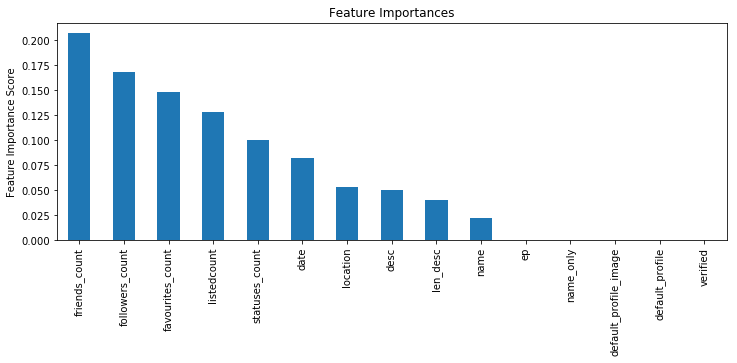

In [15]:
#random forest
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = RandomForestClassifier(n_estimators=50)
modelfit(gbm0, df, predictors)